In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import Activation, Conv2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import SGD
from keras import backend as K

Using TensorFlow backend.


In [4]:
np.random.seed(42)

In [5]:
batch_size = 32
num_classes = 10

In [6]:
# input image dimensions
img_rows, img_cols = 28, 28

In [7]:
def load_mnist_data():
    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
    
    x_train = x_train.astype('float32')/255
    x_test = x_test.astype('float32')/255
    
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')
    
    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    
    return (x_train, y_train), (x_test, y_test)

In [8]:
def fit_score_mnist_data(feature_layers, classification_layers, epochs, loss, optimizer):
    (x_train, y_train), (x_test, y_test) = load_mnist_data()

    model = Sequential(feature_layers + classification_layers)

    model.compile(
    loss=loss, 
    optimizer=optimizer, 
    metrics=['accuracy'])

    model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
    validation_data=(x_test, y_test))
    
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    return score, model

# Original CNN

In [7]:
feature_layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten()
]

In [8]:
classification_layers = [
    Dense(num_classes, activation='softmax')
]

In [9]:
score_original = []
loss = keras.losses.categorical_crossentropy
optimizer = keras.optimizers.Adadelta()

In [10]:
epochs = 1
score = fit_score_mnist_data(feature_layers, classification_layers, epochs, loss, optimizer)
score_original.append(score[0][1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 11s 182us/step - loss: 0.2159 - acc: 0.9370 - val_loss: 0.0966 - val_acc: 0.9733
Test loss: 0.096591734235
Test accuracy: 0.9733


# Improved CNN

In [11]:
feature_layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)), 
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten()
]

In [12]:
classification_layers = [
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
]

In [13]:
score_improved = []
loss=keras.losses.categorical_crossentropy
optimizer=keras.optimizers.Adadelta()

In [14]:
epochs = 1
score = fit_score_mnist_data(feature_layers, classification_layers, epochs, loss, optimizer)
score_improved.append(score[0][1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 100s 2ms/step - loss: 0.2136 - acc: 0.9352 - val_loss: 0.0510 - val_acc: 0.9836
Test loss: 0.0510165721905
Test accuracy: 0.9836


# SGD

In [16]:
feature_layers = [
    Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1)),
    Activation('relu'),
    Conv2D(32, (3, 3), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten()
]

In [17]:
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(.50),
    Dense(num_classes),
    Activation('softmax')
]

In [18]:
score_sgd = []
loss=keras.losses.categorical_crossentropy
optimizer=SGD(clipnorm=10000, clipvalue=10000)

In [19]:
epochs = 1
score = fit_score_mnist_data(feature_layers, classification_layers, epochs, loss, optimizer)
score_sgd.append(score[0][1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 93s 2ms/step - loss: 0.6740 - acc: 0.7819 - val_loss: 0.2118 - val_acc: 0.9380
Test loss: 0.211838701645
Test accuracy: 0.938


# Sigmoid Activation & Average Pooling

In [9]:
feature_layers = [
    Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1)),
    Activation('sigmoid'),
    Conv2D(32, (3, 3), padding='same'),
    Activation('sigmoid'),
    AveragePooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten()
]

In [10]:
classification_layers = [
    Dense(128),
    Activation('sigmoid'),
    Dropout(.50),
    Dense(num_classes),
    Activation('softmax')
]

In [11]:
score_sigmoid = []
loss=keras.losses.categorical_crossentropy
optimizer=SGD(clipnorm=10000, clipvalue=10000, lr=0.1, momentum=0.9)

In [12]:
epochs = 30
score = fit_score_mnist_data(feature_layers, classification_layers, epochs, loss, optimizer)
score_sigmoid.append(score[0][1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 85s 1ms/step - loss: 2.3561 - acc: 0.1016 - val_loss: 2.3036 - val_acc: 0.1032
Epoch 2/30
60000/60000 [==============================] - 85s 1ms/step - loss: 2.3084 - acc: 0.1035 - val_loss: 2.3246 - val_acc: 0.1135
Epoch 3/30
60000/60000 [==============================] - 75s 1ms/step - loss: 2.3088 - acc: 0.1038 - val_loss: 2.3075 - val_acc: 0.1135
Epoch 4/30
60000/60000 [==============================] - 84s 1ms/step - loss: 2.3079 - acc: 0.1052 - val_loss: 2.3048 - val_acc: 0.1028
Epoch 5/30
60000/60000 [==============================] - 87s 1ms/step - loss: 2.3082 - acc: 0.1035 - val_loss: 2.3074 - val_acc: 0.1009
Epoch 6/30
60000/60000 [==============================] - 87s 1ms/step - loss: 2.3083 - acc: 0.1045 - val_loss: 2.3068 - val_acc: 0.1135
Epoch 7/30
60000/60000 [==============================]

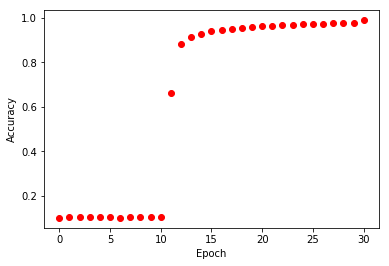

In [4]:
plt.plot([0.1016, 0.1035, 0.1038, 0.1052, 0.1035, 0.1045, 0.1031, 0.1038, 0.1045, 0.1059, 0.1035, 0.6601, 0.8803, 0.9108, 0.9279, 0.9376, 0.9440, 0.9482, 0.9532, 0.9582, 0.9605, 0.9641, 0.9665, 0.9672, 0.9691, 0.9710, 0.9722, 0.9734, 0.9745, 0.9759, 0.988], 'ro')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# MSE Loss Function

In [13]:
feature_layers = [
    Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1)),
    Activation('sigmoid'),
    Conv2D(32, (3, 3), padding='same'),
    Activation('sigmoid'),
    AveragePooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten()
]

In [14]:
classification_layers = [
    Dense(128),
    Activation('sigmoid'),
    Dropout(.50),
    Dense(num_classes),
    Activation('softmax')
]

In [15]:
score_mse = []
loss='mean_squared_error'
optimizer=SGD(clipnorm=10000, clipvalue=10000, lr=0.1, momentum=0.9)

In [16]:
epochs = 30
score = fit_score_mnist_data(feature_layers, classification_layers, epochs, loss, optimizer)
score_mse.append(score[0][1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0901 - acc: 0.1068 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 2/30
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0900 - acc: 0.1120 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 3/30
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 4/30
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0900 - acc: 0.1117 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 5/30
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 6/30
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 7/30
60000/60000 [==============================]

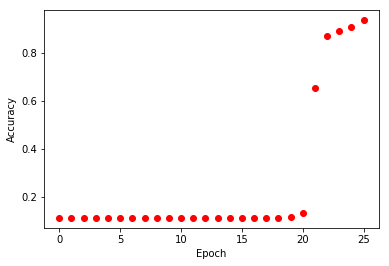

In [5]:
plt.plot([0.1116, 0.1123, 0.1122, 0.1123, 0.1124, 0.1123, 0.1123, 0.1122, 0.1122, 0.1123, 0.1124, 0.1123, 0.1123, 0.1124, 0.1122, 0.1122, 0.1123, 0.1125, 0.1120, 0.1145, 0.1340, 0.6515, 0.8678, 0.8918, 0.9050, 0.9351], 'ro')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()